# Homework 8 - Image Classification with Tensorflow and Keras

## Dataset

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. 
For this, we will use the "Bee or Wasp?" dataset that was obtained from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) and slightly rebuilt. 

You can download the dataset for this homework from [here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip):

```bash
wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
unzip data.zip
```

In [3]:
# Uncomment to run
#!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
#!unzip data.zip

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

> **Note:** you will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). 
> You can also use a computer without a GPU (e.g. your laptop), but it will be slower.


### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. 

The dataset contains separate folders for training and test sets. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

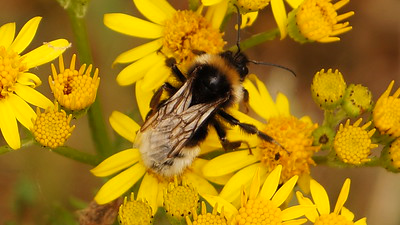

In [14]:
path = "./data/train/bee"
name = "21004953130_03d69a5dee_w.jpg"
fullname = f'{path}/{name}'
load_img(fullname)

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [25]:
inputs = keras.Input(shape=(150, 150, 3))
convol = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
pooling = keras.layers.MaxPool2D(pool_size=(2,2))(convol)
vectors = keras.layers.Flatten()(pooling)
hidden1 = keras.layers.Dense(64, activation='relu')(vectors)
outputs = keras.layers.Dense(1, activation='sigmoid')(hidden1)

model = keras.Model(inputs, outputs)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`  <--
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

In [26]:
optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [27]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                11214912  
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                           

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896  <--
* 11214912

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [19]:
data_generator = ImageDataGenerator(rescale=1./255)

train_ds = data_generator.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3678 images belonging to 2 classes.


In [20]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [21]:
test_ds = data_generator.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 918 images belonging to 2 classes.


In [28]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 8s 44ms/step - loss: 0.6713 - accuracy: 0.5748 - val_loss: 0.6248 - val_accuracy: 0.6155
Epoch 2/10
184/184 [==============================] - 8s 42ms/step - loss: 0.6152 - accuracy: 0.6615 - val_loss: 0.5693 - val_accuracy: 0.6917
Epoch 3/10
184/184 [==============================] - 8s 43ms/step - loss: 0.5682 - accuracy: 0.7113 - val_loss: 0.5671 - val_accuracy: 0.6841
Epoch 4/10
184/184 [==============================] - 8s 43ms/step - loss: 0.5288 - accuracy: 0.7520 - val_loss: 0.5285 - val_accuracy: 0.7571
Epoch 5/10
184/184 [==============================] - 8s 43ms/step - loss: 0.5021 - accuracy: 0.7694 - val_loss: 0.5177 - val_accuracy: 0.7756
Epoch 6/10
184/184 [==============================] - 8s 43ms/step - loss: 0.4829 - accuracy: 0.7866 - val_loss: 0.5428 - val_accuracy: 0.7386
Epoch 7/10
184/184 [==============================] - 8s 44ms/step - loss: 0.4541 - accuracy: 0.7980 - val_loss: 0.5023 - val_accuracy: 0.7625

In [35]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80  <--

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091  <--
* 0.131

In [34]:
print(np.median(history.history['accuracy']))

0.7780043482780457


In [36]:
print(np.std(history.history['loss']))

0.08762650864817027


### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [38]:
aug_generator = ImageDataGenerator(rescale=1./255,
                                  rotation_range=50,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_ds = aug_generator.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3678 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108

In [39]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 23s 125ms/step - loss: 0.4947 - accuracy: 0.7664 - val_loss: 0.4874 - val_accuracy: 0.7745
Epoch 2/10
184/184 [==============================] - 23s 125ms/step - loss: 0.4878 - accuracy: 0.7751 - val_loss: 0.5676 - val_accuracy: 0.7440
Epoch 3/10
184/184 [==============================] - 23s 125ms/step - loss: 0.4746 - accuracy: 0.7828 - val_loss: 0.4743 - val_accuracy: 0.7810
Epoch 4/10
184/184 [==============================] - 23s 124ms/step - loss: 0.4723 - accuracy: 0.7800 - val_loss: 0.6734 - val_accuracy: 0.7070
Epoch 5/10
184/184 [==============================] - 23s 125ms/step - loss: 0.4835 - accuracy: 0.7765 - val_loss: 0.4852 - val_accuracy: 0.7712
Epoch 6/10
184/184 [==============================] - 23s 125ms/step - loss: 0.4679 - accuracy: 0.7868 - val_loss: 0.4822 - val_accuracy: 0.7734
Epoch 7/10
184/184 [==============================] - 23s 126ms/step - loss: 0.4627 - accuracy: 0.7858 - val_loss: 0.4828 - val_ac

In [40]:
print(history.history['val_loss'])

[0.48737633228302, 0.5675827860832214, 0.47432342171669006, 0.6733549237251282, 0.48515087366104126, 0.4822339713573456, 0.4827817678451538, 0.45714348554611206, 0.4707321226596832, 0.45302003622055054]
